In [ ]:
#TODO
# create many lines, store lines --done
# calculate least squares for each line, store --done
# plot weighted mean and weighted standard deviation --done
    # shade standard deviation --done
# try 2d
# use epa.gov data --done?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
import math
%matplotlib inline
import pandas as pd 
from pandas import DataFrame, read_csv

In [5]:
# RUN CODE FOR EPA DATA

# read formaldehyde data from lower roxbury (June, July, August 2015)
Location = r'/Users/Annamira/Downloads/AQDM_751558133.txt' 
DF = pd.read_csv(Location, skipfooter=7828, engine='python')
# set y "real data" to formaldehyde data
yRD = DF['value'].values
mean_yRD = np.mean(yRD)
DF.head()

,site,data_status,action_code,datetime,parameter,duration,frequency,value,unit,qc,poc,lat,lon,GISDatum,elev,method_code,mpc,mpc_value,uncertainty,qualifiers
0,840250250042,0,10,20150717T0000-0500,43502,1440,0,4.3,78,0,4,42.3295,-71.0826,WGS84,6,102,1,0.057,NaN,NaN
1,840250250042,0,10,20150729T0000-0500,43502,1440,0,7.3,78,0,3,42.3295,-71.0826,WGS84,6,102,1,0.057,NaN,NaN
2,840250250042,0,10,20150717T0000-0500,43502,1440,0,4.5,78,0,3,42.3295,-71.0826,WGS84,6,102,1,0.057,NaN,NaN
3,840250250042,0,10,20150605T0000-0500,43502,1440,0,3.4,78,0,3,42.3295,-71.0826,WGS84,6,102,1,0.057,NaN,NaN
4,840250250042,0,10,20150816T0000-0500,43502,1440,0,3.3,78,0,3,42.3295,-71.0826,WGS84,6,102,1,0.057,NaN,NaN


In [48]:
# RUN CODE FOR GENERATED CORRELATED DATA
# "RD" stands for "real data"
# (works better with model)

nRD = 8  # number of sensor locations

# create sensor locations -- real" x data (instead of loading EPA coordinates)
xRD = np.sort(10*np.random.random_sample(nRD))

mean_RD = np.zeros(shape=(nRD,)) # set mean to 0

# fill in covariance matrix as a function of generated sensor locations
cov_RD = np.fromfunction(lambda i, j: math.e**(-((xRD[j]-xRD[i])/scale)**2), (nRD, nRD), dtype=int)

yRD = np.random.multivariate_normal(mean, cov_RD, 1).T  # generate y data ("pollution levels")
mean_yRD = np.mean(yRD)

/Users/Annamira/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: covariance is not positive-semidefinite.


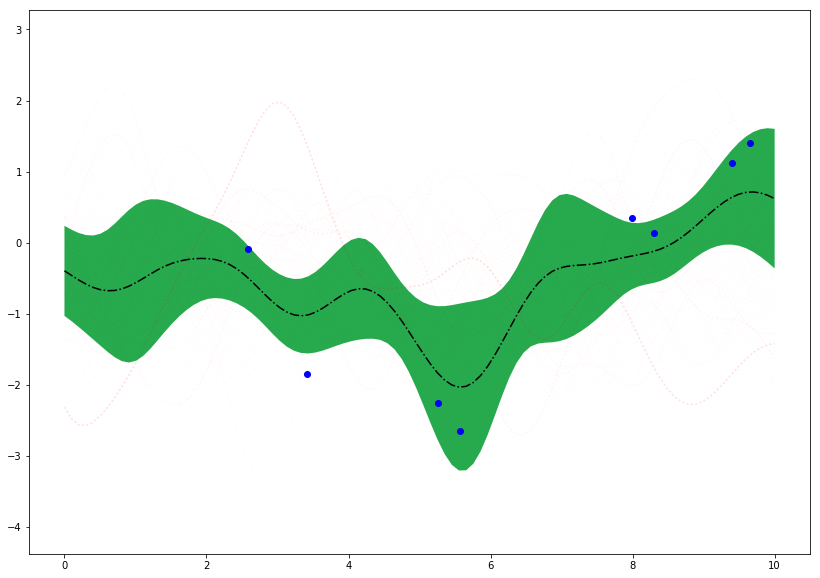

In [51]:
scale = .9  # set scale

plt.figure(figsize=(14,10))

# plot many lines and store each in a (num_lines, 2, n) shaped array

num_lines = 300
eval_points = 100
x = np.linspace(0, 10, eval_points)  #10*np.random.random_sample(n)  # random x locations
tck_array = np.zeros(shape=(num_lines), dtype=object)

lines = np.zeros(shape=(num_lines), dtype=object)
mean = mean_yRD + np.zeros(shape=(eval_points,)) # set mean of generated lines epa.gov data mean

for i in range(0, num_lines):
    
    # fill in covariance matrix as a function of generated x locations
    cov = np.fromfunction(lambda i, j: math.e**(-((x[j]-x[i])/scale)**2), (eval_points, eval_points), dtype=int)

    y = np.random.multivariate_normal(mean, cov, 1).T  # generate y data ("pollution levels")
  
    tck = splrep(x, y, xb=None, xe=None, k=1)
    tck_array[i] = tck
    hold = splev(x, tck, der=0)
    #plt.plot(x, hold, 'r:', alpha=)    
    lines[i] = hold
    
    # plt.plot(x, y, 'r-', alpha=0.7)

    plt.axis('equal')

    
# plot real data
plt.plot(xRD, yRD, 'bo')

# calculate and store squared error

weight_scale = 2

# create arrays to hold squared error and weighted squared error
squared_err =  np.zeros(shape=(num_lines), dtype=object)
weighted = np.zeros(shape=(num_lines), dtype=object)

# keep track of coefficients/scores
sum_weights = 0

# calculate
for a in range(0, num_lines):
    for b in range(0, nRD):
        y_val = splev(xRD[b], tck_array[a], der=0)
        squared_err[a] += (yRD[b]-y_val)**(2*weight_scale)
    sum_weights += 1/squared_err[a]
    weighted[a] = lines[a]/squared_err[a]

# calculate weighted means and standard deviations

deviation = np.zeros(shape=(eval_points))
mean = np.zeros(shape=(eval_points))

# accumulate weighted values
for a in range(0, num_lines):
    mean += weighted[a]
    deviation += (lines[a]**2)/squared_err[a]
        
mean = mean/sum_weights
deviation = (deviation/sum_weights - mean**2)**1

for i in range(0, num_lines):
    plt.plot(x, lines[i], 'r:', alpha=ppppp[i])   

plt.plot(x, mean, 'k-.')
plt.fill_between(x, mean-deviation, mean+deviation, facecolor='#27aa4e')
